In [5]:
!pip install spacy
!pip install kaleido
import spacy
import pandas as pd
from spacy import displacy

In [6]:
nlp1 = spacy.load(R".\output\model-best")

In [7]:
df = pd.read_csv('C:\\Users\\callm\\Desktop\\scraper\\test_data.csv', encoding="utf8")

In [8]:
dfunique = df['Text'].unique()

In [9]:
dfunique

array(['alaffia balancing day cream',
       'alba botanica sensitive fragrance free mineral sunscreen lotion',
       'allies of skin vitamin c serum',
       'alpha lipoic acid 5% by the ordinary',
       'alpha skin care dual action skin lightener',
       'aquaphor healing ointment', 'aquaphor lip repair ointment',
       'australian gold botanical tinted face sunscreen spf 50',
       'aveeno calm + restore oat gel face moisturizer, sensitive skin',
       'aveeno therapeutic shave gel', 'avene skin recovery cream',
       'banila clean it zero purity', 'bioderma sensibio h2o ',
       'biore uv aqua rich watery essence spf 50 pa+++',
       'blue lizard face mineral based sunscreen with hydrating hyaluronic acid spf 30+ uva/uvb protection',
       "burt's bees lavender and honey lip butter",
       'cerave healing ointment ', 'cerave hydrating cleanser',
       'cetaphil restoraderm eczema calming body wash',
       'clean & clear persa gel 10',
       'clinique dramatically diff

In [10]:
entities = []

In [11]:
for i in df['Text']:
    doc = nlp1(i)
    entities.append(([(ent.text, ent.label_) for ent in doc.ents]))

In [12]:
valids = []

In [13]:
for i in entities:
    v = [t for t in i if 'brand' in t]
    valids.append(v)

In [14]:
valids2 = [list(elem) for elem in valids]

In [15]:
df2 = pd.DataFrame(valids2)

In [16]:
df2 = df2.unstack().reset_index(drop=True)

In [17]:
df2 = df2.dropna().reset_index(drop=True)

In [18]:
brands = []
brands2 = []
brands3 = []
brands4 = []

In [19]:
import regex as re

In [20]:
for i in df2:
    brands.append(i[0])

In [21]:
for s in brands:
    s = s.replace("the", "").replace(":", "").replace("'", "").replace("’", "").replace("gold", "gold bond").replace("trader", "trader joes").replace("peter", "peter thomas roth").replace("corsx", "cosrx").replace("kate sommerville", "kate somerville")
    s = re.sub("(\.$)", "", s)
    brands2.append(s)

In [22]:
for l in brands2:
    y = l.lstrip()
    brands3.append(y)

In [23]:
br = ['kiehls', 'skinceuticals', 'farmacy', 'ordinary', 'vanicream', 'supergoop', 'pixi']

In [24]:
for s in brands3:
    if any(ele in s for ele in br):
        if re.search("(.*?)(?:\s)", s) != None:
            s = re.search("(.*?)(?:\s)", s)
            s = s.group(1)
            brands4.append(s)
        else:
            brands4.append(s)
    else:
        brands4.append(s)

In [25]:
bcount = {}
for i in brands4:
    if i in bcount:
        bcount[i] += 1
    else:
        bcount[i] = 1

In [26]:
mydict = {key:val for key, val in bcount.items() if val >= 4}

In [27]:
mydict

{'alpha': 10,
 'aquaphor': 6,
 'aveeno': 11,
 'avene': 6,
 'bioderma': 4,
 'biore': 7,
 'cerave': 37,
 'cetaphil': 5,
 'clinique': 21,
 'cosrx': 21,
 'drunk elephant': 9,
 'eltamd': 6,
 'etude house': 5,
 'eucerin': 7,
 'farmacy': 6,
 'first aid beauty': 14,
 'fresh': 4,
 'garnier': 8,
 'glossier': 6,
 'hada labo': 13,
 'kate somerville': 6,
 'kiehls': 7,
 'la roche posay': 25,
 'lush': 9,
 'makeup artists choice': 5,
 'neutrogena': 23,
 'nivea': 7,
 'paulas choice': 28,
 'ren': 4,
 'simple': 14,
 'skinceuticals': 4,
 'stratia': 15,
 'stridex': 7,
 'sunday riley': 4,
 'supergoop': 6,
 'body shop': 7,
 'ordinary': 24,
 'altruist': 4,
 'gold bond': 6,
 'konjac': 4,
 'laneige': 5,
 'mario': 4,
 'origins': 4,
 'peter thomas roth': 5,
 'pixi': 6,
 'purito': 4,
 'trader joes': 5,
 'tretinoin': 4,
 'vanicream': 7}

In [28]:
brandsdf = pd.DataFrame(list(mydict.items()), columns=['brands', 'count'])

In [29]:
brandsdf = brandsdf.drop(brandsdf[brandsdf.brands == 'konjac'].index)

In [30]:
brandsdf = brandsdf.drop(brandsdf[brandsdf.brands == 'tretinoin'].index)

In [31]:
brandsdf = brandsdf.drop(brandsdf[brandsdf.brands == 'alpha'].index)

In [32]:
brandsdf

,brands,count
1,aquaphor,6
2,aveeno,11
3,avene,6
4,bioderma,4
5,biore,7
6,cerave,37
7,cetaphil,5
8,clinique,21
9,cosrx,21
10,drunk elephant,9


In [33]:
!pip install wordcloud

In [34]:
!pip install plotly

In [35]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option("max_columns", 46)

In [40]:
fig = px.sunburst(brandsdf,
                  path=["brands"],
                  values="count",
                  width=750, height=750)
fig.update_layout(
    title_text='Top Brands Mentioned in Subreddit "r/skincareaddiction"')
fig.show()
#view at https://nahcg.github.io/spacyreddit/sunburst.html

In [37]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=300, max_words=50, background_color="white", min_font_size = 10).generate_from_frequencies(mydict)

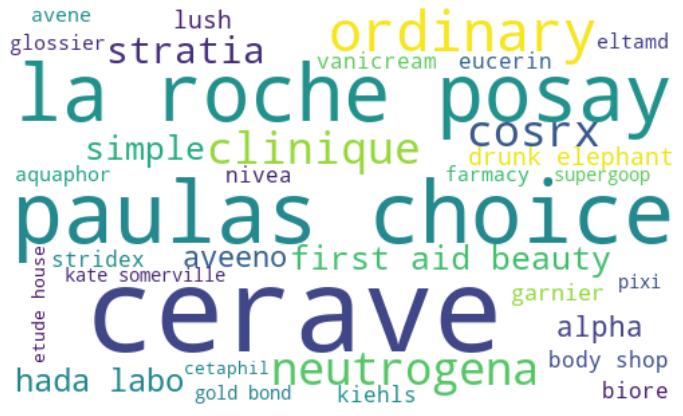

<Figure size 432x288 with 0 Axes>

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()